# AI for estimating song's popularity

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("modified_data.csv")
#data = data.sample(frac=0.2)

In [3]:
data.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_id,artists_id
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,1.140000e+05
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035,56.500000,5.034422e+07
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621,32.907844,2.866328e+07
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.148500e+04
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000,28.000000,2.565050e+07
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,56.500000,4.995879e+07
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000,85.000000,7.594484e+07
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,113.000000,9.999973e+07


In [4]:
columns = ['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
           'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre_id',
           'time_signature', 'artists_id']

layerThiccness = len(columns) * 2

# Podział danych na zbiór treningowy i testowy
train_data, test_data, train_labels, test_labels = train_test_split(
    data[columns], data['popularity'], test_size=0.2)

train_data = tf.convert_to_tensor(train_data, dtype=tf.float32)
test_data = tf.convert_to_tensor(test_data, dtype=tf.float32)
train_labels = tf.convert_to_tensor(train_labels, dtype=tf.float32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.float32)

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(layerThiccness + 1, activation='relu', input_shape=[len(columns)]),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness, activation='relu'),
    tf.keras.layers.Dense(layerThiccness / 2, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.RMSprop(0.001),
              metrics=['mae', 'mse'])

In [6]:
# Trenowanie modelu
history = model.fit(train_data, train_labels, epochs=100, validation_split=0.2, verbose=0)

In [7]:
test_results = model.evaluate(test_data, test_labels, verbose=0)
test_mae = test_results[1]

Mean Absolute Error: 18.943552017211914


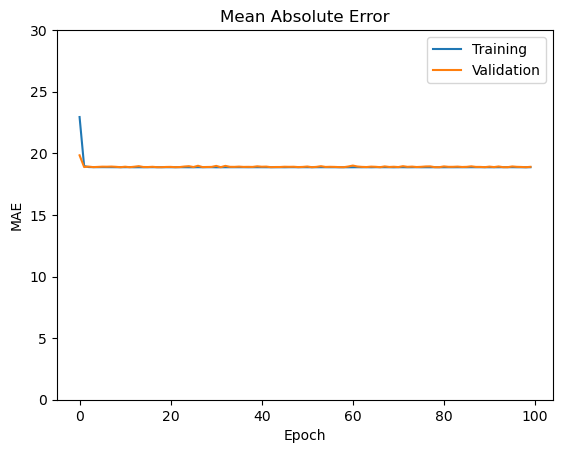

In [8]:
# Wykres
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.ylim(top=30)
plt.ylim(bottom=0)
print("Mean Absolute Error:", test_mae)
plt.show()